Import stuff

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
# plt.style.use('seaborn-whitegrid')
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

## Uncomment for nicer plots ##
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

Call an instance of the extented HANC model (Maybe rename the model class at some point)

In [38]:
model = HANCModelClass(name='model')

Print to see whatever is in 'model'

In [7]:
print(model)

Modelclass: HANCModelClass
Name: model

namespaces: ['ini', 'sim', 'par', 'sol', 'path', 'ss']
other_attrs: ['par', 'ini', 'ss', 'path', 'sim', 'grids_hh', 'pols_hh', 'inputs_hh', 'inputs_hh_z', 'outputs_hh', 'intertemps_hh', 'shocks', 'unknowns', 'targets', 'varlist', 'jac', 'H_U', 'H_Z', 'jac_hh', 'IRF']
savefolder: saved
cpp_filename: None

ini:
 Dz = ndarray with shape = (2, 10) [dtype: float64]
 Dbeg = ndarray with shape = (2, 10, 500) [dtype: float64]
 Y = nan [float]
 C = nan [float]
 I = nan [float]
 Gamma = nan [float]
 K = nan [float]
 L = nan [float]
 G = nan [float]
 B = nan [float]
 rk = nan [float]
 w = nan [float]
 r = nan [float]
 r_b = nan [float]
 A_hh = nan [float]
 C_hh = nan [float]
 clearing_A = nan [float]
 clearing_C = nan [float]
 clearing_L = nan [float]
 ELL_hh = nan [float]
 L_hh = nan [float]
 memory, gb: 0.0

sim:
 a = ndarray with shape = (1000, 2, 10, 500) [dtype: float64]
 A_hh_from_D = ndarray with shape = (1000,) [dtype: float64]
 z_trans = ndarray wi

Find the initial steady state. Write parameter values used (at least for the ones at vary later).
**This takes a few seconds**

In [39]:
model.find_ss(do_print=True)

it
it
it
it
it
it
it
it
it
it
it
it
it
it
Solver terminated
it

Steady state aggregates:
 K_ss =   3.4153
 L_ss =   1.0118
 Y_ss =   1.4575
 G_ss =   0.3000
 B_ss =   0.6204
 I_ss =   0.3415
 C_ss =   0.8160

steady state prices:
 w_ss =   1.0083
 r_ss =   0.0280

Check for market clearing:
Excess savings           = -0.0000
Exess consumption demand = -0.0000
Excess labour supply     =  0.0000


### Illustrate HH behavior

Extract model compontents for faster access

In [10]:
par = model.par
ss = model.ss

Plot the cdf and density of assets

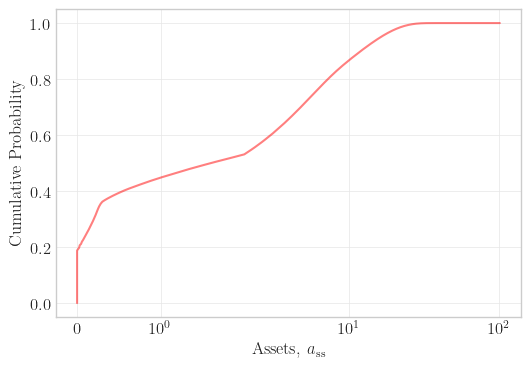

In [38]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete', color = 'red', alpha = .5)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('Assets, $a_{\mathrm{ss}}$')
ax.set_ylabel('Cumulative Probability')
ax.set_xscale('symlog')

plt.savefig('figs/cdf.pdf')

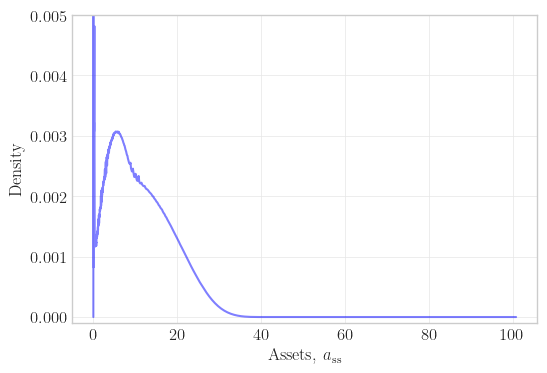

In [21]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.sum(ss.D,axis=(0,1)),0,0.0),label='discrete', color = 'blue', alpha = .5, lw = 1.5)

ax.set_ylim(-0.0001,0.005)
ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')


ax.set_xlabel('Assets, $a_{\mathrm{ss}}$')
ax.set_ylabel('Density')

plt.savefig('figs/dens.pdf')

Plot the household policy functions

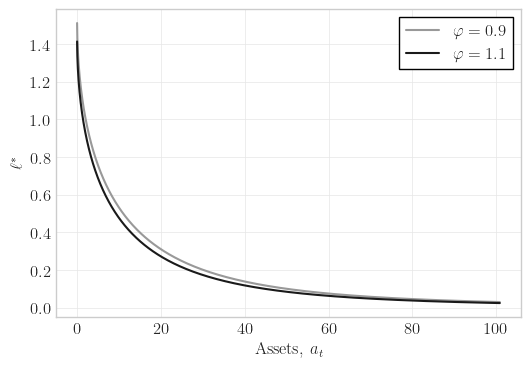

In [59]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid,ss.ell[0,1,:], color = '0.6', label = r'$\varphi = 0.9$')
ax.plot(par.a_grid,ss.ell[1,1,:], color = '0.1', label = r'$\varphi = 1.1$')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('Assets, $a_t$')
ax.set_ylabel(r'$\ell^\ast$')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('figs/ell_pols.pdf')

In [57]:
model.par.z_grid/0.9

array([0.29723277, 0.50787221, 0.86778514, 1.48275695, 2.53353976,
       0.3632845 , 0.6207327 , 1.06062628, 1.81225849, 3.0965486 ])

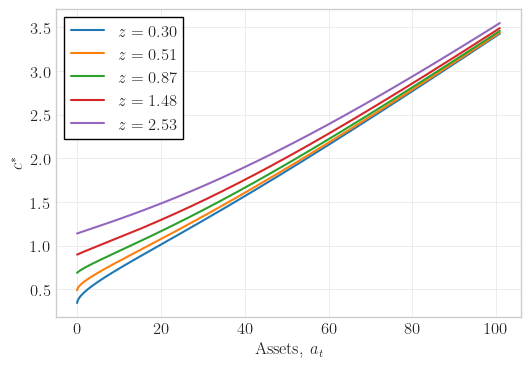

In [58]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.plot(par.a_grid, ss.c[0,0,:], label = r'$z=0.30$')
ax.plot(par.a_grid, ss.c[0,1,:], label = r'$z=0.51$')
ax.plot(par.a_grid, ss.c[0,2,:], label = r'$z=0.87$')
ax.plot(par.a_grid, ss.c[0,3,:], label = r'$z=1.48$')
ax.plot(par.a_grid, ss.c[0,4,:], label = r'$z=2.53$')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlabel('Assets, $a_t$')
ax.set_ylabel(r'$c^\ast$')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('figs/c_pols.pdf')

## Illustrate the effect of the tax rate on the equilibrium

I run the code whith $\tau^a = 0.0$ and $\tau^a = 0.2$ as a comparison to the baseline calibration

In [25]:
# Define two instances of the model, with different tax rates
model_low_tau = HANCModelClass(name='low',par={'tau_a':0.0})
model_high_tau = HANCModelClass(name='high',par={'tau_a':0.2})

Run the two models and save the results

In [29]:
model_low_tau.find_ss(do_print=True)

it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
Solver terminated
it

Steady state aggregates:
 K_ss =   3.5406
 L_ss =   1.0121
 Y_ss =   1.4736
 G_ss =   0.3000
 B_ss =   0.3802
 I_ss =   0.3541
 C_ss =   0.8195

steady state prices:
 w_ss =   1.0192
 r_ss =   0.0249

Check for market clearing:
Excess savings           =  0.0000
Exess consumption demand = -0.0000
Excess labour supply     = -0.0000


In [32]:
model_high_tau.find_ss(do_print=True)

it
it
it
it
it
it
it
it
it
it
it
Solver terminated
it

Steady state aggregates:
 K_ss =   3.2680
 L_ss =   1.0118
 Y_ss =   1.4383
 G_ss =   0.3000
 B_ss =   0.8966
 I_ss =   0.3268
 C_ss =   0.8115

steady state prices:
 w_ss =   0.9951
 r_ss =   0.0320

Check for market clearing:
Excess savings           =  0.0000
Exess consumption demand = -0.0000
Excess labour supply     = -0.0000


## Check for some optimal level of taxation

In [43]:
model_range = HANCModelClass(name='range')

In [47]:
model_tau.ss.U_hh

-2.0047612123450578

In [48]:
taus = [0.0,0.04,0.08,0.16,0.20,0.24,0.28,0.32]
U_hh = np.zeros(len(taus))
B = np.zeros(len(taus))
r = np.zeros(len(taus))

for i,tau in enumerate(taus):
    
    model_tau = HANCModelClass(name='range',par={'tau_a':tau})
    
    model_tau.find_ss(do_print=False)
    
    print(f'{model_tau.ss.r = :8.3f}')
    print(f'{model_tau.ss.B = :8.3f}')
    print(f'{model_tau.ss.U_hh = :12.8f}\n')
    
    U_hh[i] = model_tau.ss.U_hh
    B[i] = model_tau.ss.B
    r[i] = model_tau.ss.r

it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.025
model_tau.ss.B =    0.380
model_tau.ss.U_hh =  -2.00476121

it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.026
model_tau.ss.B =    0.472
model_tau.ss.U_hh =  -2.00693781

it
it
it
it
it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.027
model_tau.ss.B =    0.570
model_tau.ss.U_hh =  -2.00936110

it
it
it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.030
model_tau.ss.B =    0.781
model_tau.ss.U_hh =  -2.01510699

it
it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.032
model_tau.ss.B =    0.897
model_tau.ss.U_hh =  -2.01853111

it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.034
model_tau.ss.B =    1.019
model_tau.ss.U_hh =  -2.02240896

it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.036
model_tau.ss.B =    1.148
model_tau.ss.U_hh =  -2.02682368

it
it
it
it
it
it
it
it
it
it
it
model_tau.ss.r =    0.038
model_tau.ss.B =    1.285
model_tau.ss.U_hh =  -2.0318781

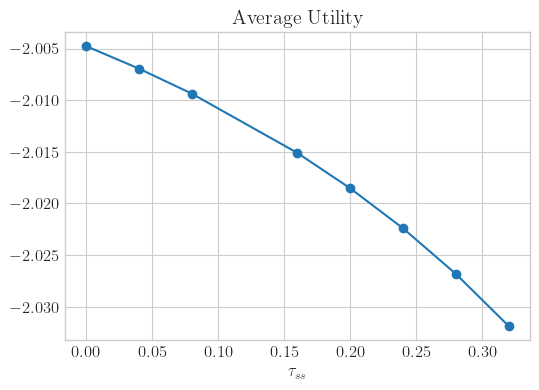

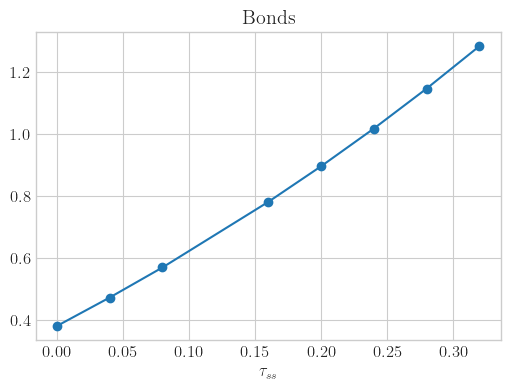

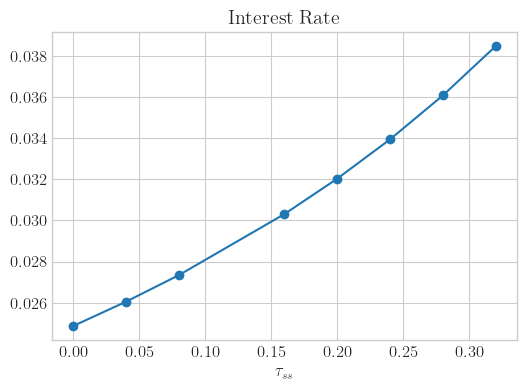

In [55]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.set_title('Average  Utility')
ax.plot(taus,U_hh,'-o')
ax.set_xlabel('$\\tau_{ss}$')
plt.savefig('figs/u.pdf')

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.set_title('Bonds')
ax.plot(taus,B,'-o')
ax.set_xlabel('$\\tau_{ss}$')
plt.savefig('figs/B.pdf')

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.set_title('Interest Rate')
ax.plot(taus,r,'-o')
ax.set_xlabel('$\\tau_{ss}$')
plt.savefig('figs/r.pdf')